            Ali, Zeenat             Homework 4               CMSC 678 Spring 2020

# 1.	XOR problem in Tensorflow Playground
#### a)	Describe why it is called the XOR problem, and why it provides a problem to other classifiers we’ve studied.
**Answer**: The Tensorflow Playground XOR problem is called the XOR problem because the data shown cannot be separated by a single straight line. As shown on website: https://playground.tensorflow.org/#dataset=xor ,there are two clusters of orange and blue dots , each representing a class, say orange and blue, sitting at a corner of a square. If we draw a line vertically or horizotally, we will end up having one cluster of each class in each partition. If we draw diagonal lines with different slopes and positions, we will always end up having some instances of both the classes in each parttion, thereby not allowing us to linearly classify the data. This is analogous to 2 bit XOR data with inputs and outputs as follows[3]:<br>
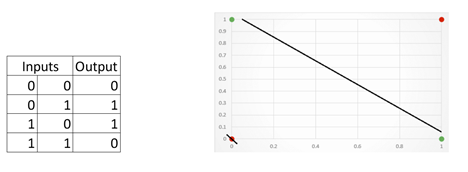
<br>
It provides problem to other classifiers because the classifiers that we have studied like perceptron classifies data only if the data is linearly separable otherwise, it will never converge. Hence, those classifiers are not fit for classifying the XOR data in Tensor Playground XOR problem.

#### b)	Notice how each of the neurons has some gradient shading. Describe what this shading represents.
**Answer**: The gradient shading showed by each of the neurons is the representation of the weights on features at each neuron. The weight decides the importance of the respective feature in predicting the corresponding class. In the given playground tensorflow model, the correct class or positive class is said to be blue and orange represents negative class. The blue shading shows positive weights and orange shading shows negative weights. The zero weights are represented by white color forming a white line at the separation of positive and negative regions. The intensity of the shades represents how big the negative or positive number is on weights inferring how confident the model is in predicting the respective class.

#### c)	For 16 configurations of a model; train for 1,000 epochs and report on the final testing loss. Plot your results and discuss what you observed.
**Answer**: The 16 configurations were taken and the test loss were recorded for respective configurations as follows:
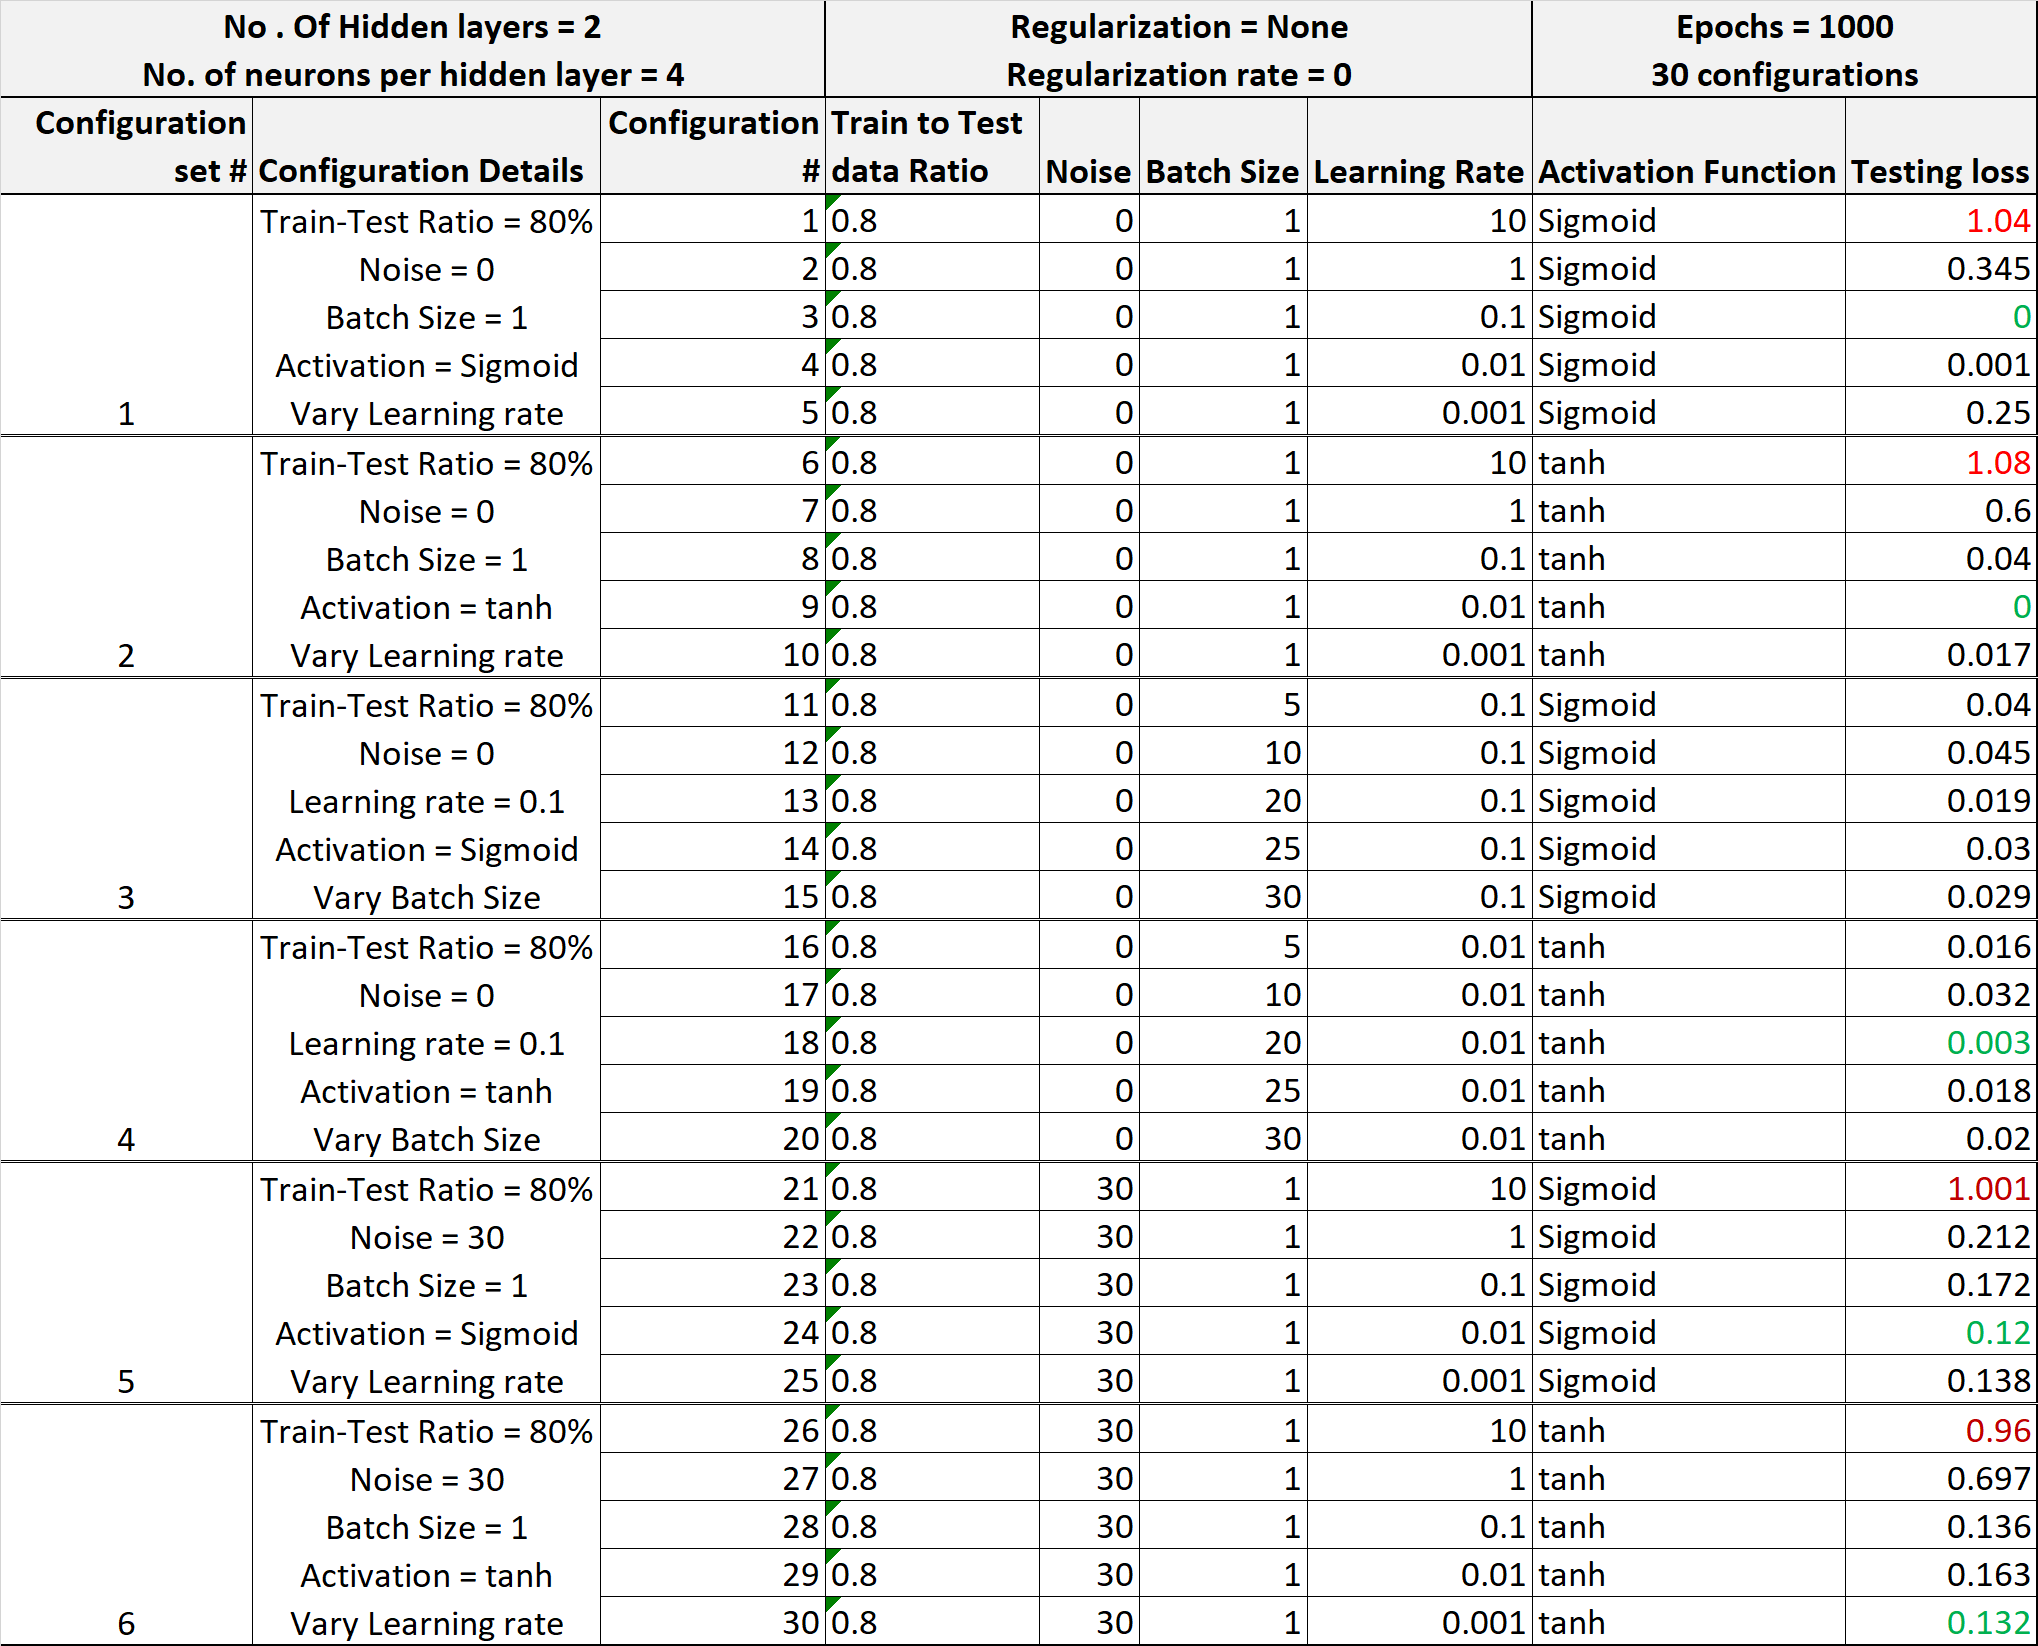
<br>**Explanation:** Number of hidden layers taken were 2 and no. of neurons per hidden layer taken were 4 for all configurations. Also, regularization has been selected as None and regularization rate is set to 0 for all configurations. Six set of configurations have been considered, each with 5 variations resulting in 30 configurations in total. The model was trained on two activation functions, viz. `Sigmoid` and `tanh`, 3 sets of configurations for each activation. In the first set, the learning rate was varied keeping the remaining parameters fixed as shown in table. The second set was same as first except for the activation which was changed from Sigmoid to tanh. Similarly, for third and fourth set of configurations, the batch size was varied. Fifth and sixth set of configuration were same as first and second, except a noise of 30 was added. Each configuration was trained for approximately 1000 epochs.<br> 


**Results:**
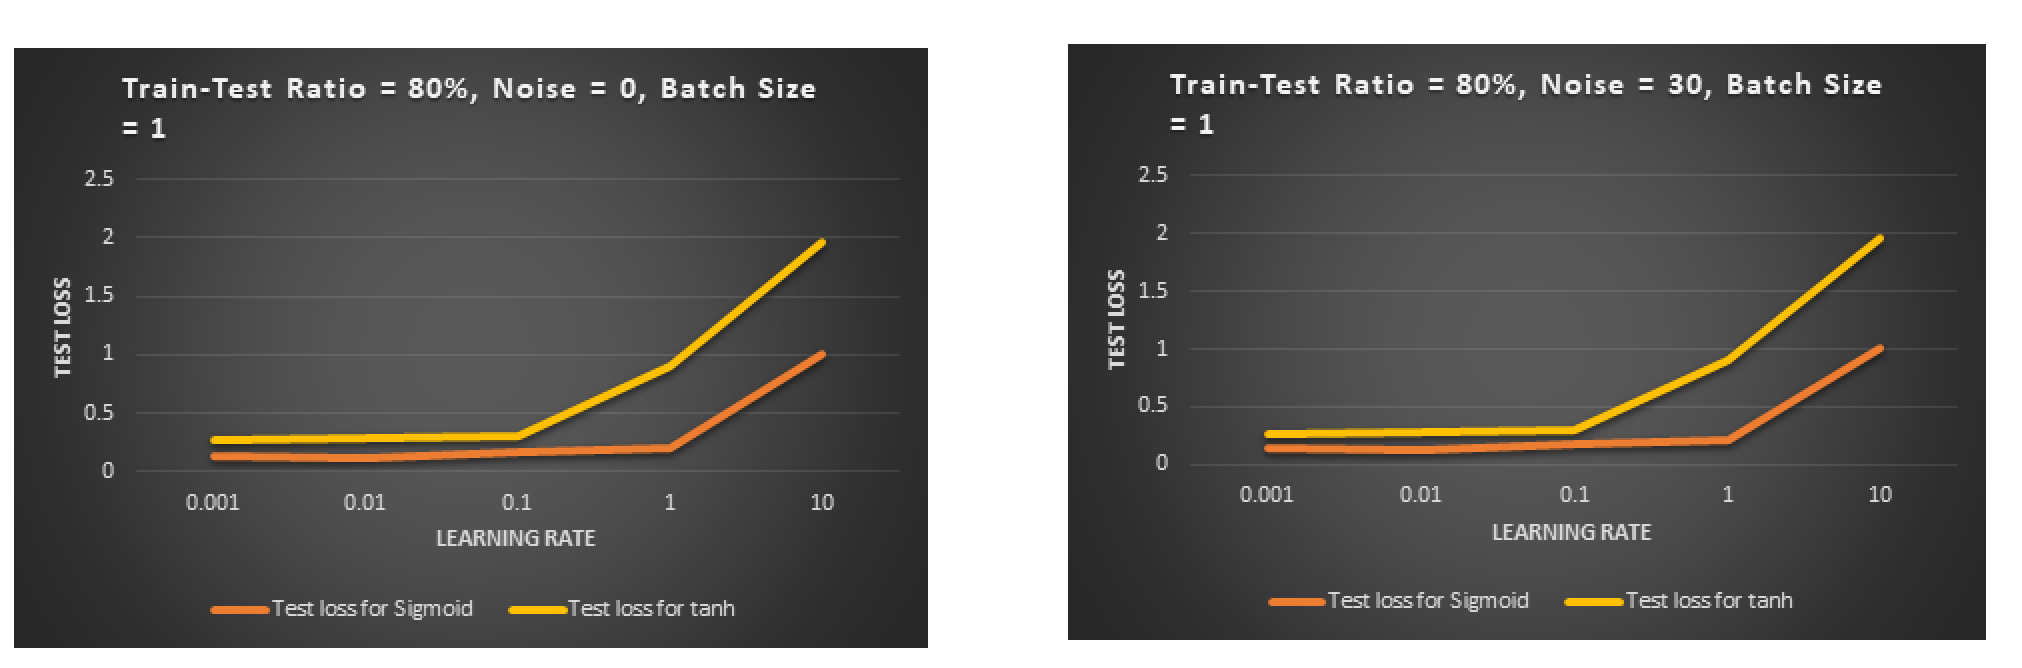

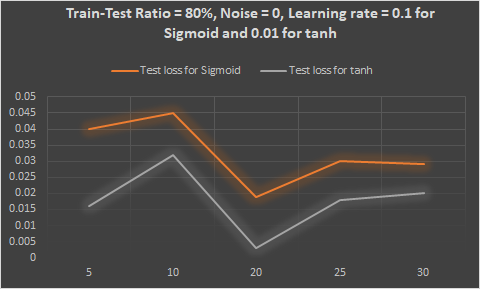

**Observations:**<br>
`Sigmoid function and Learning rate`:
- It was observed that for sigmoid function, when ratio of training data to test data was set to 80% with batch size = 1, and learning rate as 10, the test loss was as high as 1.00. When learning rate was reduced to 1 and then 0.1, the test loss reduced to approximately 30% and then to 0% inferring that the accuracy can be improved with lower learning rate as we are allowing our weights to update slowly with smaller steps to reach the minimum slope. And so there are less chances of skipping the minimum slope. However, when we further reduce the learning rate to 0.01 and then 0.001, we get test loss of 1% and then 25%. One explanation for this could be that at such low learning rate, the training model does not succeed fully in converging and hence does not reach the minimum slope. 
- It was also observed that for initial epochs upto 100 the accuracy with learning rate = 1 for sigmoid function, the loss was still 50%. When gradually the data was trained further upto 1000 epochs, the test loss further reduced to 0.009 and so with more epochs since with more training, weights are further updated resulting in correct classification.

`Tanh function and Learning rate`:
- Similar behaviour as Sigmoid was observed for tanh, however, it needed further lower learning rate to yield 0% test loss with approx. 60% test loss at learning rate = 1 and 4% test loss at  learning rate = 0.1. The model converges fully at learning rate = 0.01 and learning rate of 0.001 also proves to be much slower for tanh resulting in test loss of 0.017. 

`Sigmoid function and Batch size`:
- Since sigmoid function enables the model to converge at learning rate of 0.1, this learning rate was kept fixed, and the batch size was varied.
- Based on the result data shown in table, it was observed that the batch size does not seem to have much effect on test loss. However, for all batch sizes, the minimum test loss of 0 was when batch size was smallest which was 1.
- One conclusion that can be drawn is for learning rate = 0.1, batch size of 1 is ideal. It may vary if the learning rate varies.

`Tanh function and Batch size`:
- Since tanh function enables the model to converge at learning rate of 0.01, this learning rate was kept fixed, and the batch size was varied.
- The increase in batch size intially increased the test loss, and then converges to as low as 0.003 at batch size = 20. When batch size is further increased, the test loss  increases. In either of the cases, the test loss was still minimum when batch size was 1.
- It was also observed that when learning rate was changed to 0.1, and batch size was then set to 3 and 19, higher batch size gave better results. Hence, it can be concluded that for learning rate = 0.01, batch size of 1 is ideal. It may vary if the learning rate varies.

`Sigmoid function and Learning rate with noise = 30`:
- With one step lower learning rate than when tested without noise, the model was able to nearly converge the noisy data till test loss of 0.12 but could not achieve 0 loss.  
- The test loss is still high with high learning rate of 10.

`Tanh function and Learning rate with noise = 30`:
- With one step lower learning rate than when tested without noise, the model was able to nearly converge the noisy data till test loss of 0.12 but could not achieve 0 loss.
- The test loss is still high with high learning rate of 10.

# 2.	Derive the partial derivatives of the loss function for a feedforward multilayer perceptron

Given: a feedforward multilayer perceptron model with <br>
- Input vector $x_{i}$ with D dimensions, i.e., $x_{i} \epsilon R^{D}$<br>
- Corresponding label vector $y_{i}$ with K dimensions (one - hot label)<br>
- L hidden layers, each hidden layer represented by l such that 1 ≤ l ≤ L + 1
- l' as cross entropy loss function to calculate error
- neuron index for each layer l is represented by j, and jth neuron is computed as 

Eq-1: $$ h_{l,j} = f^{(l)}(<w_{l,j}, h_{l-1,*}>)$$
<br>
  where $h_{l,j}$ is a scalar and $h_{l−1,∗}$ is a vector of all of the neurons in layer $l − 1$. $w_{l,j}$ is also a vector.
- Also $h_{0,∗} = h_{0} = x_{i}$ and
- $h_{L+1,∗}$ is the output values we pass into our loss function.


#### a)	What function must $f^{(L+1)}$ be to use a cross-entropy loss function?
**Answer**: Since the model contains L hidden layers, L+1 should be the output layer and so to use a cross entropy as the loss function for K dimensional label, we must use `softmax` as the activation function on output layer.

#### b)	What are the parameters that must be learned?
**Answer**: The parameters that must be learned will be the weights between input layer and first hidden layer, between all hidden layers and between last hidden layer and output layer (at each neuron for each hidden layer), i.e. all $w_{l,j}$ or $w_{*,*}$ for all layer l and all neurons j at each layer l. 

#### c)	If D = 100, L = 2, K = 3, and each hidden layer (non-input or output layer) has 50 neurons, how many parameters are there in total?
**Answer**: Since there are 2 hidden layers (L = 2) and each hidden layer has 50 neurons, the model will look like as follows:<br>
Input layer(D=100) ---$\blacktriangleright$ L1(50 neurons) ---$\blacktriangleright$ L2(50 neurons) ---$\blacktriangleright$ Output layer(K=3)<br>
Therefore, 100$*$50 parameters between Input layer & L1 + 50$*$50 parameters between L1 & L2 + 50$*$3 parameters between L2 and Output layer<br>
$$= 100 * 50 + 50 *50 + 50 * 3$$
$$= 5000 + 2500 + 150$$
$$= 7650$$
$==\blacktriangleright$ `7650 parameters`

#### d)	 Let D, L, K, and the number of neurons (call it E) be unknown. For each variable ♣, derive the partial derivate $\frac{∂l'}{∂♣}$ . Since you do not know D, L, K or E, you may provide a general partial derivative formula for some subset of the variables, a second formula for another subset, etc. The formulas you do provide must give a way of computing the partial derivative for each variable. 
**Answer**: Given (if not, we assume):
- input vector $x_{k}$ with D dimension
- target class label vector $y_{i}^{*}$ with K dimension, where $ i \epsilon K$
- predicted class label vector $y_{i}$
- $h_{l,j}$ represents hidden layer where l denotes hidden layers 1 to L, and j denotes the neurons from 1 to E in each each hidden layer l
- weights between the layers are represented by ♣. Let weights between hidden layer $l_{j}$ and output layer $y_{i}$ be $♣_{ji}$. Similarly, let weights between input layer $x_{k}$ and hidden layer $l_{j}$ be $♣_{kj}^{1}$.
- Since each neuron j of each hidden layer l is computed by using activation as: $ h_{l,j} = f^{(l)}(<♣_{l,j}, h_{l-1,*}>)$. For convenience to compute derivative`[5]`, I will use $s_{i}$ to represent weighted sums of all neurons for a hidden layer l activation fed to output layer(l = L+1), and $s_{j}^{1}$ to represent weighted input sum between input layer $x_{k}$ and hidden unit j of layer l. Therefore<br>
**Eq-I:** $$ s_{i} = \Sigma_{j=1} l_{j}.♣_{ji} $$ and<br> 
**Eq-II:** $$ s_{j}^{1} = \Sigma_{j=1} x_{k}.♣_{kj}^{1} $$

A rough sketch of what has been described above:<br>
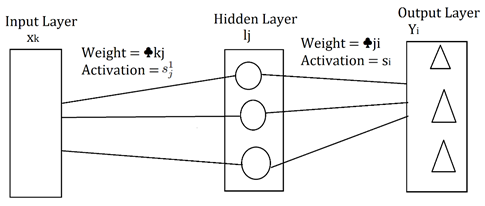

Since $y_{i}$ is a vector of K dimenstion, and is not a binary class, I will use softmax activation at the output layer and so
<br>
**Eq-III**: $$ y_{i} = \frac{e^{s_{i}}}{ \Sigma_{c}^{nclass} e^{s_{c}}} $$ <br>
where $y_{i}$ is the softmax activation at ith output unit, $s_{c}$ denotes activation for class c and the denominator denotes normalization among all classes nclass like $e^{s_{1}}+e^{s_{2}}+e^{s_{3}}..$ so on upto $e^{s_{nclass}}$ .<br>
Using cross entropy loss function l' for multiclass output:<br>
**Eq-IV**: $$ l' = - \Sigma _{i}^{nclass} y_{i}^{*} \log (y_{i}) $$<br> 
**Objective:** We have to find  $\frac{∂l'}{∂♣}$.<br>
First we, compute error with respect to output by comparing predicted label with target label.
$$\frac{∂l'}{∂y_{i}} = -\frac{y_{i}^{*}}{y_{i}}$$
Computing the partial derivative for each variable will have two parts.
1. Error with respect to weights between hidden layer and output layer, $♣_{ji}$ in this case, $\frac{∂l'}{∂♣_{ji}}$
2. Error with respect to weights between input layer and hidden layer, $♣_{kj}^{1}$ in this case, $\frac{∂l'}{∂♣_{kj}^{1}}$<br>

###### For part 1, computing the derivative using the chain rule:<br>
**Eq-V**:$$\frac{∂l'}{∂♣_{ji}} =  \frac{∂l'}{∂y_{i}} \frac{y_{i}}{∂s_{i}} \frac{s_{i}}{∂♣_{ji}}$$

For computing the gradient w.r.t s_{i} - since it is a softmax function, and we normalize based on all classes, we consider two cases:
1. when we calculate the gradient of ith class label w.r.t ith activation (if we take $s_{i}$ as $s_{k}$ then i = k) 
2. when we calculate the gradient of ith class label w.r.t all other activations except ith activation (if we take $s_{i}$ as $s_{k}$ then $i \neq k$)<br>
Therefore, by using Eq-III:
$$ \frac{∂y_{i}}{∂s_{k}} =\begin{equation}
\left\{ 
  \begin{aligned}
    \frac{e^{s_{i}}}{ \Sigma_{c}^{nclass} e^{s_{c}}} - (\frac{e^{s_{i}}}{ \Sigma_{c}^{nclass} e^{s_{c}}})^{2}  ,  i = k\\
    -\frac{e^{s_{i}}e^{s_{k}}}{ (\Sigma_{c}^{nclass} e^{s_{c}})^{2}} ,  i \neq k\\
  \end{aligned}
  \right.
\end{equation}
$$<br>
**Eq-VI**:
$$\frac{∂y_{i}}{∂s_{k}} =\begin{equation}
\left\{ 
  \begin{aligned}
    y_{i} (1 - y_{i}),  i = k\\
    -y_{i}y_{k} ,  i \neq k\\
  \end{aligned}
  \right.
\end{equation}
$$
The above result has been derived for all activations when i=k and $i \neq k$, however we are interested only in case when i = k so we subtract the remaining term to yield $\frac{∂l'}{s_{i}}$ as follows :<br>
**Eq-VII**:
$$\frac{∂l'}{s_{i}} = \Sigma _{k}^{nclass} \frac{∂l'}{∂y_{k}} \frac{∂y_{k}}{∂s_{i}} = \frac{∂l'}{∂y_{i}} \frac{∂y_{i}}{∂s_{i}} - \Sigma _{k \neq i} \frac{∂l'}{∂y_{k}} \frac{∂y_{k}}{∂s_{i}} =  -y_{i}^{*}(1 -y_{i})  + \Sigma _{k \neq i} y_{k}^{*} y_{i} =  - y_{i}^{*} + y_{i} \Sigma_{k}y_{k}^{*} = y_{i} - y_{i}^{*}$$

Since the first two components of Eq-V has been solved in Eq-VI, now using Eq-I, we solve Eq-V as follows:<br>
**Eq-VIII**:
$$\frac{∂l'}{∂♣_{ji}} = \Sigma_{i} \frac{∂l'}{∂s_{i}} \frac{∂s_{i}}{∂♣_{ji}} = (y_{i} - y_{i}^{*})l_{j}$$

Eq-VII gives the gradients of the error with respect to the weights in the last layer of the
network, now to compute the gradients with respect to the weights in lower layers we apply backpropagation in part 2.
###### For part 2, computing the derivative using the chain rule:
**Eq-IX**:$$\frac{∂l'}{∂♣_{kj}^{1}} =  \frac{∂l'}{∂s_{j}^{1}} \frac{∂s_{j}^{1}}{∂♣_{kj}^{1}}$$

The gradient for weights in units in the hidden layer l, indexed by j, is calculated as follows:
For computing the gradient w.r.t $s_{j}^{1}$, and solving using Eq-VII, Eq-I and Eq-VI:<br>
**Eq-X**:
$$ \frac{∂l'}{∂s_{j}^{1}} = \Sigma _{i}^{nclass} \frac{∂l'}{∂s_{i}} \frac{∂s_{i}}{∂l_{j}} \frac{∂l_{j}}{∂s_{j}^{1}} = \Sigma _{i}^{nclass} (y_{i} - y_{i}^{*})(∂♣_{ji})(l_{j} (1 - l_{j})) $$
*Note1:In the above equation consider $l_{j}$ as new output layer and $s_{j}^{1}$ as activation fed into $l_{j}$ similar to output layer $y_{i}$ and activation $s_{i}$ for part 1.*<br>
Also, gradient w.r.t hidden layer can be give as:
$$ \frac{∂l'}{∂l_{j}} = \Sigma _{i=1} \frac{∂l'}{∂y_{i}} \frac{∂y_{i}}{∂s_{i}} \frac{∂s_{i}}{∂x_{j}} = \Sigma_{i} \frac{∂l'}{∂y_{i}}(y_{i}(1 - y_{i}))(∂♣_{ji}) $$
Finally, using Eq-II and Eq-X in Eq-IX gives:
$$ \frac{∂l'}{∂♣_{kj}^{1}} = \Sigma _{i}^{nclass} (y_{i} - y_{i}^{*})(∂♣_{ji})(l_{j} (1 - l_{j}))(x_{k})$$
Hence, Part 1 and Part 2 lists down partial derivative for each variable for top layer and bottom layer of network. To calculate derivatives within multiple hidden layers, same computation as given in Eq-X can be done by updating the output layer and activation as mentioned in Note1.

#### e)	[Eq-1] does not include an explicit bias; describe how you can include the bias without changing [Eq-1] (or the derived gradients).
**Answer**: To include the bias we simply add the bias element in the input vector (like we did for perceptron algorithm while calculating weight updates). This will change the dimension of input vector $x_{i}$,from (say) D to D+1, therefore $x_{i} \epsilon R^{D+1}$. Corresponding weight vectors will have similar dimensions as input vector for that layer. This means that for jth neuron, the weight is still represented as $w_{l,j}$; only the dimension of the vector will vary, leaving [Eq-1] or derived gradients unchanged.

# 3.	Multiclass neural network classifier
#### a)	Implementation and convergence criterion:
**Answer**: The multiclass neural network classifier with one hidden layer is implemented using python. The implementation has two parts – <br> 
*(1) a class named MulticlassNN.py is implemented that contains the definition of training model and* <br>
*(2) a train-test implementation named TrainTestNN.ipynb that uses training model MulticlassNN class to run the training and test data (dev data) with different configurations.* <br>
**In MulticlassNN Neural network model**,
- no. of layers (input, hidden and output), no. of neurons per hidden layer, activation function and cost function are initialized. <br>
- An input layer to hidden layer and a hidden layer amongst themselves are connected using activation functions which implies, output of layer is input to the next layer after activation function is acted upon each set of inputs until it reaches final output layer. I have used three activation functions – sigmoid, tanh and softmax, implemented using NumPy package’s inbuilt functions – tanh, exp, sum and divide. <br>
- The training model has three steps, viz. forward pass, error computation and backward pass. Each instance will go through activation function while forward pass and error is computed at output. Based on error, it will be back propagated by taking the derivative deltas w.r.t the weights and weights are updated by multiplying the derivative with learning rate and adding to the previous weight to decide on size of learning step, i.e., calculating the gradient.
- Error is computed based on two cost functions, viz. cross entropy or mean square error. <br>
- Accuracy percentage is then computed based on total correctly classified predicted labels.

In [20]:
import numpy as np
import dill as dill

class MulticlassNNClassifier:
    # Initialize no of layers( input, hidden and output), no. of neurons, activation and cost functions
    def __init__(self, noOfLayers, neurons, activation, costFunction):
        self.layers = []
        self.noOfLayers = noOfLayers
        self.neurons = neurons
        self.cost_function = costFunction

        # Declare vector size for each neuron in each layer, the elements in neuron list should match no. of layers
        if not noOfLayers == len(neurons):
            raise ValueError("Layers and neuron count mismatch")

        # Include next layer neurons for input layer and all hidden layers (excluding output layer)
        for x in range(noOfLayers):
            if x != noOfLayers-1:
                layer_x = layer(neurons[x], neurons[x+1], activation[x])
            else:
                layer_x = layer(neurons[x], 0, activation[x])
            self.layers.append(layer_x)

    # Each instance will go through activation function while forward pass, then error is computed at output;
    # based on error, it will be back propagated, weights are updated and again passed forward until the classifier
    # converges and a decent accuracy is attained.
    def trainNeuralNetwork(self, batch, trainingDataX, trainingLabelY, epochs, learningRate, filename):
        self.batch = batch
        self.learningRate = learningRate
        for j in range(epochs):
            i = 0
            while i+batch != len(trainingDataX):
                self.error = 0
                self.forwardPass(trainingDataX[i:i+batch])
                self.computeError(trainingLabelY[i:i+batch])
                self.backPropagate(trainingLabelY[i:i+batch])
                i += batch
            self.error /= batch
            print("\nError: ", self.error)
        dill.dump_session(filename)

    # Each forward pass will update weights based on an activation function
    def forwardPass(self, TrainingDataX):
        self.layers[0].activations = TrainingDataX
        for i in range(self.noOfLayers-1):
            tempMat = np.add(np.matmul(self.layers[i].activations, self.layers[i].currentLayerWeights), self.layers[i].currentLayerBias)
            if self.layers[i+1].activation == "sigmoid":
                self.layers[i+1].activations = self.sigmoid(tempMat)
            elif self.layers[i+1].activation == "tanh":
                self.layers[i+1].activations = self.tanh(tempMat)
            elif self.layers[i+1].activation == "softmax":
                self.layers[i+1].activations = self.softmax(tempMat)
            else:
                self.layers[i+1].activations = tempMat

    # Activation function = sigmoid
    def sigmoid(self, layer):
        return np.divide(1, np.add(1, np.exp(np.negative(layer))))

    # Activation function = tanh
    def tanh(self, layer):
        return np.tanh(layer)
    
    # Activation function = softmax
    def softmax(self, layer):
        exp = np.exp(layer)
        if isinstance(layer[0], np.ndarray):
            return exp/np.sum(exp, axis=1, keepdims=True)
        else:
            return exp/np.sum(exp, keepdims=True)

    # Error can be calculate based on cost function as cross entropy or mean squared
    def computeError(self, trainingLabelY):
        if len(trainingLabelY[0]) != self.layers[self.noOfLayers-1].currentLayerNeurons:
            print ("Error: Label Y and output layer matrix dimension mismatch.")
            return
        if self.cost_function == "meanSquared":
            self.error += np.mean(np.divide(np.square(np.subtract(trainingLabelY, self.layers[self.noOfLayers-1].activations)), 2))
        elif self.cost_function == "crossEntropy":
            self.error += np.negative(np.sum(np.multiply(trainingLabelY, np.log(self.layers[self.noOfLayers-1].activations))))

    # Once we have error, we apply back propagation by differeniating w.r.t activation and update weights to improve accuracy 
    def backPropagate(self, trainingLabelY):
        targets = trainingLabelY
        i = self.noOfLayers-1
        y = self.layers[i].activations
        deltab = np.multiply(y, np.multiply(1-y, targets-y))
        deltaw = np.matmul(np.asarray(self.layers[i-1].activations).T, deltab)
        new_weights = self.layers[i-1].currentLayerWeights - self.learningRate * deltaw
        new_bias = self.layers[i-1].currentLayerBias - self.learningRate * deltab
        for i in range(i-1, 0, -1):
            y = self.layers[i].activations
            deltab = np.multiply(y, np.multiply(1-y, np.sum(np.multiply(new_bias, self.layers[i].currentLayerBias)).T))
            deltaw = np.matmul(np.asarray(self.layers[i-1].activations).T, np.multiply(y, np.multiply(1-y, np.sum(np.multiply(new_weights, self.layers[i].currentLayerWeights),axis=1).T)))
            self.layers[i].currentLayerWeights = new_weights
            self.layers[i].currentLayerBias = new_bias
            new_weights = self.layers[i-1].currentLayerWeights - self.learningRate * deltaw
            new_bias = self.layers[i-1].currentLayerBias - self.learningRate * deltab
        self.layers[0].currentLayerWeights = new_weights
        self.layers[0].currentLayerBias = new_bias
    
    def computeAccuracy(self, filename, inputDataX, labelY):
        dill.load_session(filename)
        self.batch = len(inputDataX)
        self.forwardPass(inputDataX)
        a = self.layers[self.noOfLayers-1].activations
        a[np.where(a==np.max(a))] = 1
        a[np.where(a!=np.max(a))] = 0
        total=0
        correct=0
        for i in range(len(a)):
            total += 1
            if np.equal(a[i], labelY[i]).all():
                correct += 1
        #print("Accuracy percentage: ", correct*100/total)

class layer:
    def __init__(self, currentLayerNeurons, nextLayerNeurons, activation):
        self.currentLayerNeurons = currentLayerNeurons
        self.activation = activation
        self.activations = np.zeros([currentLayerNeurons,1])
        #Random distribution of weights for hidden layers and adding bias element
        if nextLayerNeurons != 0:
            self.currentLayerWeights = np.random.normal(0, 0.001, size=(currentLayerNeurons, nextLayerNeurons))
            self.currentLayerBias = np.random.normal(0, 0.001, size=(1, nextLayerNeurons))
        else:
            self.currentLayerWeights = None
            self.currentLayerBias = None

**In train-test implementation,**<br>
- mnist data and MulticlassNN is imported. Ratio of training data to test data taken is approximately 80% with 60,000 samples used as training data and 10,000 samples as test data or dev data.
- The data is then converted to numpy array format to perform numpy operations.
- A network is created using MulticlassNN neural network train model by plugging in appropriate configuration. The baseline model takes 3 layers, viz. input layer, one hidden layer and output layer. The input vector has 784 dimension, hidden layer has 20 neurons and output layer has 10 elements to represent one hot label corresponding to output class labels 0 to 9.
- The activation for input layer is set as none as no activation is needed at input layer. I have taken tanh as the activation function for hidden layer and softmax activation function for output layer.
- The error is calculated based on cost function as cross Entropy.
- Once the configurations are set, training data is passed to configured network to train the model with 5 iterations (epochs) and a learning rate of 0.01. The training is done collectively in a single batch. A filename 'Result.pkl is used for pickling, i.e, to store the intermediary result to perform numpy operations.
- Once the data is trained, the accuracy is calculated for the training data.
- The trained model is then applied to test data for its accuracy.

In [5]:
#%pip install python-mnist
import numpy as np
from mnist import MNIST

#Import MNIST data and load training and Dev/Test data 
mnist = MNIST('mnist-dataset')
TrainingDataX, TrainingLabelY = mnist.load_training() # 60000 training samples
TestDataX, TestLabelY = mnist.load_testing()          # 10000 test samples

#Converting data to numpy array format
TrainingData = np.asarray(TrainingDataX).astype(np.float32)
TrainingLabel = np.asarray(TrainingLabelY).astype(np.int32)
TestDataX = np.asarray(TestDataX).astype(np.float32)
TestLabelY = np.asarray(TestLabelY).astype(np.int32)

# Baseline: Train Neural Network - Single hidden layer using tanh activation and output layer using softmax activation
NumberOfLabels = 10
Trainingclass = np.eye(NumberOfLabels)[TrainingLabel] # converting to one -hot label
Network = MulticlassNNClassifier(3, [784, 20, 10], [None, "tanh", "softmax"], costFunction="crossEntropy")
Network.trainNeuralNetwork(1, trainingDataX=TrainingData, trainingLabelY=Trainingclass, epochs=5, learningRate=0.01, filename="Result.pkl")
print("--Training--")
Network.computeAccuracy("Result.pkl", TrainingData, Trainingclass)

# Test Baseline Neural Network
TestClass = np.eye(NumberOfLabels)[TestLabelY]
print("--Testing--")
Network.computeAccuracy("Result.pkl", TestDataX, TestClass)


Error:  11.401783581588525

Error:  12.103429761243897

Error:  12.511878385891734

Error:  12.80113050612269

Error:  13.025277139420904
--Training--
Accuracy percentage:  89.43333333333334
--Testing--
Accuracy percentage:  88.1


**Convergence criteria:**<br>
- Weights and bias have been initialized based on random normal distribution.
- For each derivative w.r.t activation while back propagating, weights are updated using the gradients from current weight and again passed forward to check for error at each neuron. <br>
- The process continues until the error stabilizes and stops reducing further based on cost function.
- Eventually the updated weights starts giving right classification of labels and converges to an accuracy of about 88%.

**Baseline model configuration:**
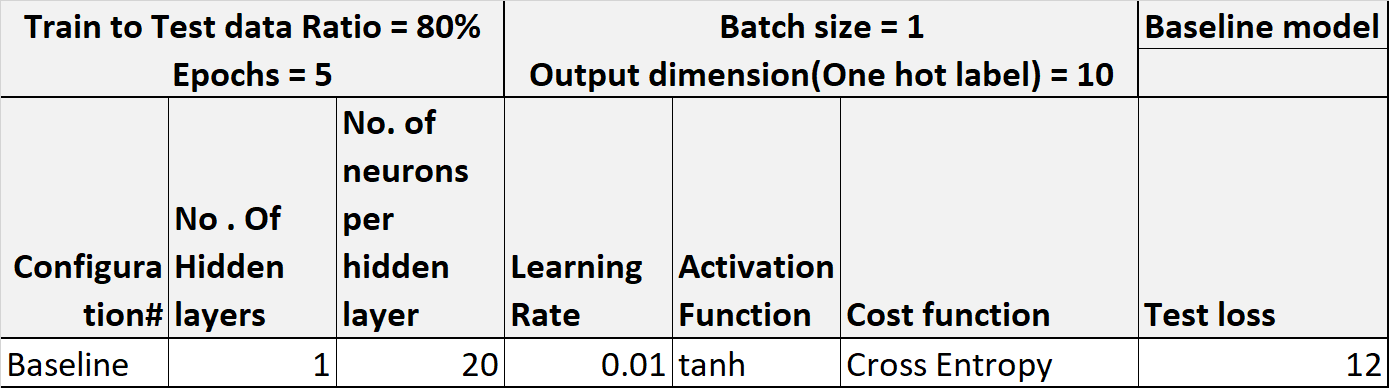

**Limitation:**
Since data is huge, I could only train it for 5 epochs. Increasing the epochs will eventually converge the data to 0 error. 

#### b)	Validation using XOR input data:
**Answer**: As discussed in Question 1 part (a), a normal classifier like perceptron cannot classify data if it is XOR data, it is then the need of neural networks comes into picture. Therefore, we will test the above neural network model on XOR data to validate that it works for non linear data and hence solve the purpose of classifying XOR data.
In the following implementation a simple two-bit XOR data with its respective class label has been taken and fed into the baseline training model implemented above with following configuraion:
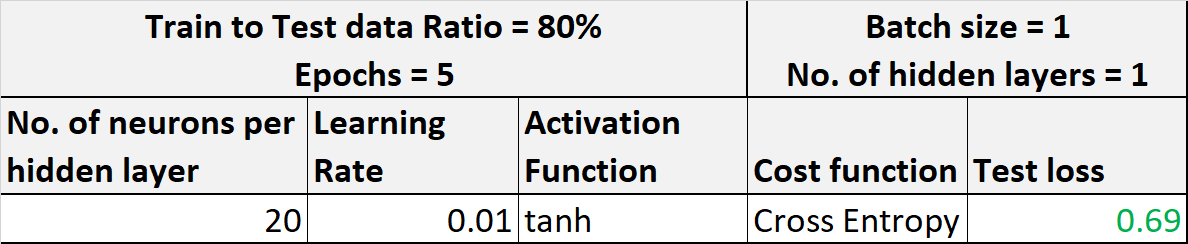

<br> and tested for error. After few epochs, the model converges and results in error as low as 0.69 and hence the validation succeeds.
<br>**Limitation:**
Since data is huge, I could only train it for 5 epochs. Increasing the epochs will eventually converge the data to 0 error. 

In [23]:
#XOR  data 
datum_1 = [0, 0]
datum_2 = [0, 1]
datum_3 = [1, 0]
datum_4 = [1, 1]

training_dataX = [datum_1, datum_2, datum_3, datum_4]
training_labelY = [0, 1, 1, 0]

# #Converting data to numpy array format
X = np.array(training_dataX).astype(np.float32)
Y = np.asarray(training_labelY).astype(np.int32)

# Baseline: XOR data Train Neural Network - Single hidden layer using tanh activation and output layer using softmax activation
NumberOfLabels = 2
Trainingclass = np.eye(NumberOfLabels)[Y] # one hot label 
Network = MulticlassNNClassifier(3, [2, 20, 2], [None, "tanh", "softmax"], costFunction="crossEntropy")
Network.trainNeuralNetwork(1, trainingDataX=X, trainingLabelY=Trainingclass, epochs=5, learningRate=0.01, filename="ResultXOR.pkl")


Error:  0.692870507935481

Error:  0.6941215052673655

Error:  0.6953787753228786

Error:  0.6966423494747606

Error:  0.6979122591714713


#### c)	Analysis of multiclass neural network classifier:
**Answer**: The resulting error for each configuration is avergaged out over 5 epochs and recorded. A graph was contructed based on the following readings:
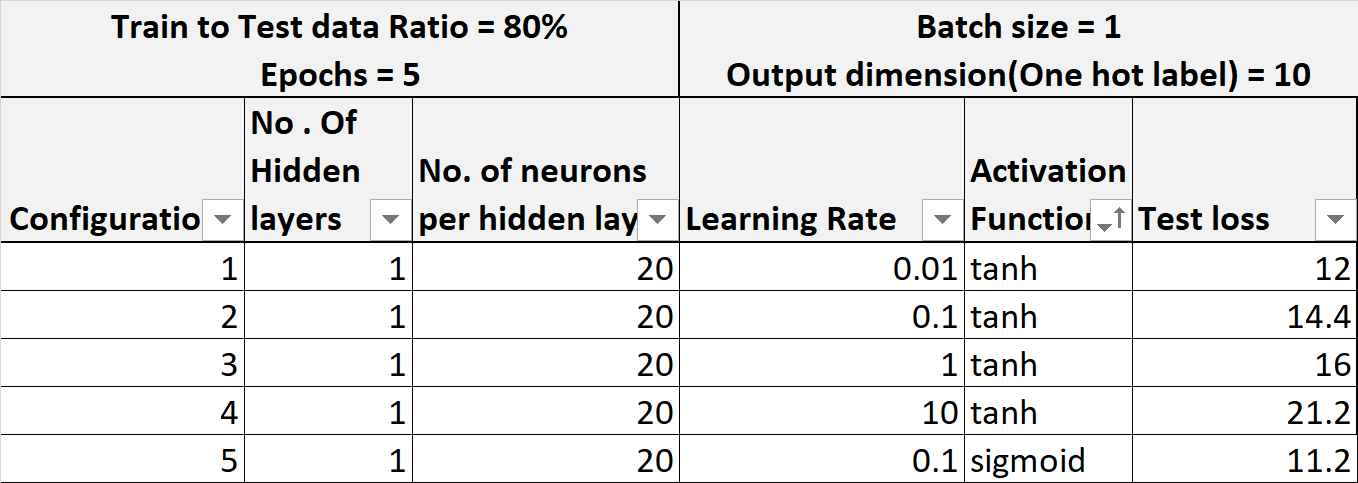

In [15]:
# Configurations are varied as shown in table above using the following code:
#Configuration:1: Baseline
print("Configuration:1: Baseline")
Network = MulticlassNNClassifier(3, [784, 20, 10], [None, "tanh", "softmax"], costFunction="crossEntropy")
Network.trainNeuralNetwork(1, trainingDataX=TrainingData, trainingLabelY=Trainingclass, epochs=5, learningRate=0.01, filename="Result.pkl")
#-----------------------
#Configuration:2
print("Configuration:2")
Network = MulticlassNNClassifier(3, [784, 20, 10], [None, "tanh", "softmax"], costFunction="crossEntropy")
Network.trainNeuralNetwork(1, trainingDataX=TrainingData, trainingLabelY=Trainingclass, epochs=5, learningRate=0.1, filename="Result.pkl")
#-----------------------
#Configuration:3
print("Configuration:3")
Network = MulticlassNNClassifier(3, [784, 20, 10], [None, "tanh", "softmax"], costFunction="crossEntropy")
Network.trainNeuralNetwork(1, trainingDataX=TrainingData, trainingLabelY=Trainingclass, epochs=5, learningRate=1, filename="Result.pkl")
#-----------------------
#Configuration:4
print("Configuration:4")
Network = MulticlassNNClassifier(3, [784, 20, 10], [None, "tanh", "softmax"], costFunction="crossEntropy")
Network.trainNeuralNetwork(1, trainingDataX=TrainingData, trainingLabelY=Trainingclass, epochs=5, learningRate=10, filename="Result.pkl")
#-----------------------
#Configuration:5
print("Configuration:5")
Network = MulticlassNNClassifier(3, [784, 20, 10], [None, "sigmoid", "softmax"], costFunction="crossEntropy")
Network.trainNeuralNetwork(1, trainingDataX=TrainingData, trainingLabelY=Trainingclass, epochs=5, learningRate=0.1, filename="Result.pkl")

Configuration:1: Baseline

Error:  11.356899201187273

Error:  12.059556052644412

Error:  12.468345210031545

Error:  12.757758510796833

Error:  12.981987211309338
Configuration:2

Error:  13.88946254204502

Error:  14.581803043983424

Error:  14.986643383242868

Error:  15.27384886320214

Error:  15.496609559419552
Configuration:3

Error:  15.771258706876697

Error:  16.46442045915193

Error:  16.869916572229247

Error:  17.157629182267275

Error:  17.380800936056303
Configuration:4

Error:  20.732659028247692

Error:  21.38367656853606

Error:  21.764783071624844

Error:  22.035313093012487

Error:  22.245227760715736
Configuration:5

Error:  10.718212163638348

Error:  11.430100423509236

Error:  11.841493946291124

Error:  12.13200460326248

Error:  12.356767885619426


**Analysis and Summarization:**
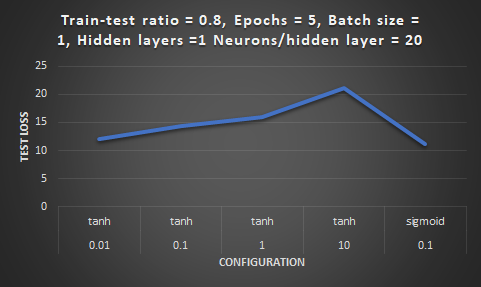
- The tanh activation performs best at learning rate of 0.01.
- While the sigmoid performs equally good at learning rate of 0.1.
- As the learning rate increases from 0.01 to 10 for tanh function, the error increases.
- This plot is quite similar to tensorflow playground model, where tanh and sigmoid performed best at learning rate of 0.01 and 0.1 respectively.

# 4.	Evaluate models on the original 10,000 image test set
**Answer**:  To evaluate models, I take Configuration 1 as my baseline model and configuration 5 as my best neural configuration to compare results with.
- After training both the models on 60000 training set, they were evaluated on original 10000 image set data.
- It was observed that the best selected model performed slightly better than baseline better with an average error of 9.2 when ran through 5 epochs. 
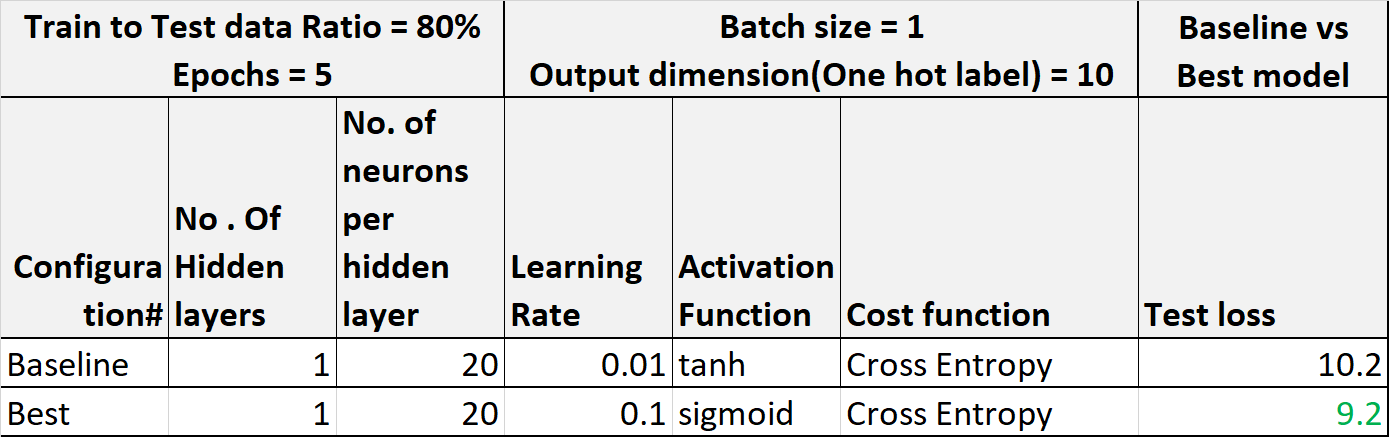

In [21]:
#Import MNIST data and load training and Dev/Test data 
mnist = MNIST('mnist-dataset')
TestDataX, TestLabelY = mnist.load_testing()          # 10000 test samples

#Converting data to numpy array format
TestDataX = np.asarray(TestDataX).astype(np.float32)
TestLabelY = np.asarray(TestLabelY).astype(np.int32)

#Configuration:1: Baseline
print("Configuration:1: Baseline")
NumberOfLabels = 10
Trainingclass = np.eye(NumberOfLabels)[TestLabelY] # converting to one -hot label
Network = MulticlassNNClassifier(3, [784, 20, 10], [None, "tanh", "softmax"], costFunction="crossEntropy")
Network.trainNeuralNetwork(1, trainingDataX=TestDataX, trainingLabelY=Trainingclass, epochs=5, learningRate=0.01, filename="Result.pkl")
#-----------------------
#Configuration:5: Best selected neural configuration
print("Configuration:5 - best neural configuration")
Network = MulticlassNNClassifier(3, [784, 20, 10], [None, "sigmoid", "softmax"], costFunction="crossEntropy")
Network.trainNeuralNetwork(1, trainingDataX=TestDataX, trainingLabelY=Trainingclass, epochs=5, learningRate=0.1, filename="Result.pkl")

Configuration:1: Baseline

Error:  9.533052898324627

Error:  10.28221644173197

Error:  10.705554194452974

Error:  11.002032157802525

Error:  11.23034003928218
Configuration:5 - best neural configuration

Error:  8.574959084545892

Error:  9.40944500823121

Error:  9.857828246409177

Error:  10.166181717279688

Error:  10.401441774748708


The readings of error were recorded and plotted as follows:
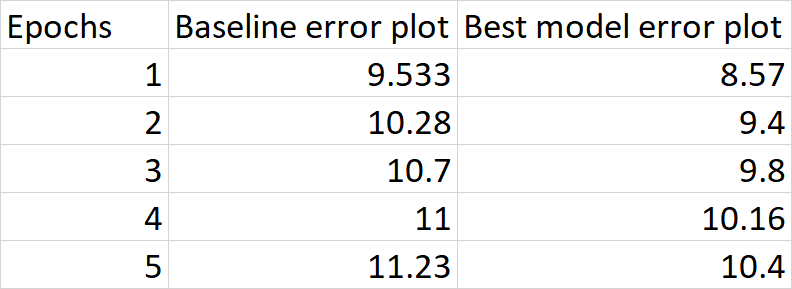

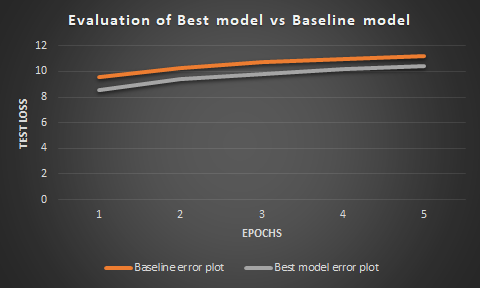

**Conclusion:**
- Based on above results, it can be concluded that when fed the best learning rate the activation functions `sigmoid` and `tanh` perform more or less the same, tanh being slighlty slower. The results would have more closely been observed, if ran through more epochs, which was one of the limitation to the project.
- Another conclusion that can be drawn and is the purpose of the assignment is that when the input is in the XOR format, or is not linearly separable, a simple algorithm like perceptron fails to classify the data and neural networks are useful in such cases.
- With increasing the no. of layers or neurons per layer, more convoluted classification can be resolved.
- There are various computation accelerators that can be used to speed up the runtime of neural networks that were not used in this assignment given the time and scope. But the assignment can be extended to improve the above accuracy by incorporating more epochs to about 1000. 

# References

- [1] Playground Tensor XOR problem is taken from: https://playground.tensorflow.org/#dataset=xor
- [2] Lecture slides and homework problem has been taken from : https://www.csee.umbc.edu/courses/graduate/678/spring20
- [3] XOR diagram for 1.(a) has been taken from: https://medium.com/@jayeshbahire/the-xor-problem-in-neural-networks-50006411840b
- [4] MNIST Dataset has been loaded from: https://www.renom.jp/notebooks/tutorial/neuralnetwork/download_mnist/notebook.html
- [5] Back propagation and generation of partial derivative is studied & referred from: https://www.ics.uci.edu/~pjsadows/notes.pdf
- [6] Report was prepared in Jupyter Notebook and imported to pdf.
- [7] Graphs and tables were prepared using MS Excel. 